# Academic Performance and Alcholism of High Schoolers

While I was browsing different datasets on the web, I came across this dataset on Kaggle, that's about alcoholism of high school students, and its effects on their academic performance. 

This immediately caught my attention, not only because drinking in high school is illegal in the States. 

The data came from a survey study, conducted by P.Cortex and A.Silva in 2008. The survey collects various qualitative information from high school students in Portugal, such as the student's socialeconomical conditions, family situations, life style choices, etc. 

This seems interesting enough, as I am intrigued of whether there are correlations and patterns among those factors. Not only that, the survey has a combined 648 entries - an large sample size for this particular study, and could lead to pretty reliable conclusions.

Additionally, I wanted to do data analysis that is more qualitative. I want to be able to process survey data and draw conclusions from it. It is a handy skill to have as a UX designer / researcher.

Kaggle Link:

https://www.kaggle.com/datasets/gabrielluizone/high-school-alcoholism-and-academic-performance

https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

Data Source: 

P. Cortez e A. Silva. Usando a Mineração de Dados para Prever o Desempenho do Aluno do Ensino Médio. Em A. Brito e J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, abril de 2008, EUROSIS, ISBN 978-9077381-39-7.


### Import

In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

### Table Attributes

Here are the attributes of this table:

1. school - student's school 
    (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    
2. sex - student's sex 
    (binary: 'F' - female or 'M' - male)
    
3. age - student's age 
    (numeric: from 15 to 22)
    
4. address - student's home address type 
    (binary: 'U' - urban or 'R' - rural)
    
5. famsize - family size 
    (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    
6. Pstatus - parent's cohabitation status 
    (binary: 'T' - living together or 'A' - apart)
    
7. Medu - mother's education 
    (numeric: 0 - none, 
              1 - primary education (4th grade), 
              2 – 5th to 9th grade, 
              3 – secondary education or 
              4 – higher education)
                
8. Fedu - father's education 
    (numeric: 0 - none, 
            1 - primary education (4th grade), 
            2 – 5th to 9th grade, 
            3 – secondary education or 
            4 – higher education)
            
9. Mjob - mother's job 
            (nominal: 'teacher', 
                       'health' care related, 
                        civil 'services' (e.g. administrative or police), 
                        'at_home' or 
                        'other')
10. Fjob - father's job 
            (nominal: 'teacher', 
                       'health' care related, 
                        civil 'services' (e.g. administrative or police), 
                        'at_home' or 
                        'other')
                        
11. reason - reason to choose this school 
            (nominal: close to 'home', 
                    school 'reputation', 
                    'course' preference or 
                    'other')
                    
12. guardian - student's guardian 
            (nominal: 'mother', 
                    'father' or 
                    'other')
                    
13. traveltime - home to school travel time 
            (numeric: 1 - <15 min., 
                        2 - 15 to 30 min., 
                        3 - 30 min. to 1 hour, or 
                        4 - >1 hour)
                        
14. studytime - weekly study time 
            (numeric: 1 - <2 hours, 
                        2 - 2 to 5 hours, 
                        3 - 5 to 10 hours, or
                        4 - >10 hours)
                        
15. failures - number of past class failures 
            (numeric: n if 1<=n<3, else 4)
            
16. schoolsup - extra educational support 
            (binary: yes or no)
            
17. famsup - family educational support 
            (binary: yes or no)
            
18. paid - extra paid classes within the course subject (Math or Portuguese) 
            (binary: yes or no)
            
19. activities - extra-curricular activities 
            (binary: yes or no)
            
20. nursery - attended nursery school 
            (binary: yes or no)
            
21. higher - wants to take higher education 
            (binary: yes or no)
            
22. internet - Internet access at home 
            (binary: yes or no)
            
23. romantic - with a romantic relationship 
            (binary: yes or no)
            
24. famrel - quality of family relationships 
            (numeric: from 1 - very bad to 5 - excellent)
            
25. freetime - free time after school 
            (numeric: from 1 - very low to 5 - very high)
            
26. goout - going out with friends 
            (numeric: from 1 - very low to 5 - very high)
            
27. Dalc - workday alcohol consumption 
            (numeric: from 1 - very low to 5 - very high)
            
28. Walc - weekend alcohol consumption 
            (numeric: from 1 - very low to 5 - very high)
            
29. health - current health status 
            (numeric: from 1 - very bad to 5 - very good)
            
30. absences - number of school absences 
            (numeric: from 0 to 93)

Grades:

1. G1 - first period grade (numeric: from 0 to 20)
2. G2 - second period grade (numeric: from 0 to 20)
3. G3 - final grade (numeric: from 0 to 20, output target)

### Data Preparation

While I was browsing, I found out that this The dataset comes in two separate csv file. 
https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

At first I assumed that they are just the same survey distributed at two different schools, so I tried to concatinate them:

In [26]:
df1 = pd.read_csv("./student-mat.csv")
df2 = pd.read_csv("./student-por.csv")

In [6]:
df = pd.concat([df1, df2])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


However I found out that the two datasets have many overlapping attributes. After doing a bit of digging, I realized that some of the two dataframes entries actually came from the same students (382 overlaps). These two databases also records scores on different subjects.

In [28]:
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [27]:
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


I thought about joining the two databases based on shared columns of shared attributes, like such:

In [46]:
columns = ["school", 
           "sex", 
           "age", 
           "address", 
           "famsize", 
           "Pstatus", 
           "Medu", 
           "Fedu", 
           "Mjob", 
           "Fjob", 
           "reason", 
           "nursery",
          "internet"]

df = pd.merge(df1, df2, on=columns, how='inner')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,...,3,4,4,2,2,5,3,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


Although I now do have more information on the grades of different subjects (which can lead to less biased conclusions), the merged database is harder to process. 

Although there were 382 of the same students filling in these two surveys, it seems like they were filled at different times. 

I found out because if I add parameters such as 'famrel'(family relationship) and 'freetime'(free time after school) to the 'on' parameter, it leads to less matches. These are all things that would change over time.


In [50]:
columns = ["school", 
           "sex", 
           "age", 
           "address", 
           "famsize", 
           "Pstatus", 
           "Medu", 
           "Fedu", 
           "Mjob", 
           "Fjob", 
           "reason", 
           "nursery",
          "internet",
          "famrel",
          "freetime"]

df = pd.merge(df1, df2, on=columns, how='inner')
len(df)

#371 items
#last entry had 381 items

371

Then I understood that merging these two dataframes will lead to complications: it's hard to process two different states at two different time of the same person.

To maximize the sample size, I am adding entries in df2 that df1 doesn't have, to df1 using merge, and setting the 'how' to 'outer.


However this method has a lot of problem. It seems like because there are overlapping entries, the method keeping a copy of those repeated entries, by making additional columns to record the overlaps.

I was looking for ways to compare the two dataframe df1 and df2, find the common rows (identify by comparing a set of given columns), and delete those rows in df2. I would then concatinate this array with df1 to form a new dataframe. However, I tried a lot of methods and non seemed to work.

I ended up doing it the ineffecient way. I just merge df1 and df2 with 'how' set to 'outer', then visually observed the new dataframe table named dfx.

In [216]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# pd.set_option('display.max_columns', 18)
# pd.set_option('display.max_rows', 20)

columns = ["school", 
           "sex", 
           "age", 
           "address", 
           "famsize", 
           "Pstatus", 
           "Medu", 
           "Fedu", 
           "Mjob", 
           "Fjob", 
           "reason", 
           "nursery",
          "internet"]
dfx = pd.merge(df1, df2, on=columns, how='outer')
dfx

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_x,traveltime_x,studytime_x,failures_x,schoolsup_x,famsup_x,paid_x,activities_x,nursery,higher_x,internet,romantic_x,famrel_x,freetime_x,goout_x,Dalc_x,Walc_x,health_x,absences_x,G1_x,G2_x,G3_x,guardian_y,traveltime_y,studytime_y,failures_y,schoolsup_y,famsup_y,paid_y,activities_y,higher_y,romantic_y,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0,mother,2.0,2.0,0.0,yes,no,no,no,yes,no,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0,father,1.0,2.0,0.0,no,yes,no,no,yes,no,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1.0,2.0,3.0,yes,no,yes,no,yes,yes,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0,mother,1.0,2.0,0.0,yes,no,no,no,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0,mother,1.0,3.0,0.0,no,yes,no,yes,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0,father,1.0,2.0,0.0,no,yes,no,no,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,1.0,2.0,5.0,10.0,15.0,15.0,15.0,mother,1.0,2.0,0.0,no,yes,no,yes,yes,no,5.0,4.0,2.0,1.0,2.0,5.0,6.0,12.0,12.0,13.0
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,1.0,1.0,3.0,0.0,12.0,12.0,11.0,mother,1.0,2.0,0.0,no,no,no,no,yes,no,4.0,4.0,4.0,1.0,1.0,3.0,0.0,13.0,12.0,13.0
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,1.0,1.0,6.0,6.0,5.0,6.0,mother,2.0,2.0,0.0,yes,yes,no,no,yes,no,4.0,1.0,4.0,1.0,1.0,1.0,2.0,10.0,13.0,13.0
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,2.0,2.0,1.0,1.0,1.0,0.0,16.0,18.0,19.0,mother,1.0,2.0,0.0,no,yes,no,no,yes,no,4.0,2.0,2.0,1.0,1.0,1.0,0.0,15.0,16.0,17.0
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,1.0,1.0,5.0,0.0,14.0,15.0,15.0,mother,1.0,2.0,0.0,no,yes,no,yes,yes,no,5.0,5.0,1.0,1.0,1.0,5.0,0.0,12.0,12.0,13.0


There was a whole lot of "NAN" value on row index 407 for '_x' columns, and that's where the overlap ends. I just need to add everything after index 407 of dfx to df1.

In [209]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 20)

dfCut = dfx.iloc[407:].reset_index(drop=True)
dfCut

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_x,...,higher_y,romantic_y,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,M,16,U,GT3,T,2,3,other,other,course,NaN,...,yes,yes,3.0,2.0,3.0,2.0,2.0,1.0,4.0,13.0,12.0,13.0
1,GP,F,18,U,GT3,T,2,1,services,other,reputation,NaN,...,no,yes,5.0,4.0,5.0,1.0,3.0,5.0,10.0,10.0,9.0,8.0
2,GP,F,17,U,LE3,A,2,1,other,other,course,NaN,...,yes,no,3.0,2.0,2.0,1.0,2.0,5.0,8.0,11.0,10.0,11.0
3,GP,M,16,U,GT3,T,2,1,at_home,other,course,NaN,...,yes,no,3.0,2.0,1.0,1.0,1.0,2.0,4.0,9.0,9.0,11.0
4,GP,F,16,U,GT3,A,2,2,other,other,home,NaN,...,yes,no,5.0,3.0,4.0,1.0,1.0,5.0,12.0,13.0,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,MS,F,19,R,GT3,A,1,1,at_home,at_home,course,NaN,...,no,yes,3.0,5.0,4.0,1.0,4.0,1.0,0.0,8.0,0.0,0.0
271,MS,F,18,R,GT3,T,2,2,services,other,home,NaN,...,yes,yes,4.0,2.0,1.0,1.0,1.0,4.0,5.0,14.0,14.0,15.0
272,MS,F,18,R,LE3,A,1,2,at_home,other,course,NaN,...,yes,yes,4.0,3.0,4.0,1.0,4.0,5.0,0.0,16.0,15.0,15.0
273,MS,F,19,R,GT3,T,1,1,at_home,other,course,NaN,...,yes,yes,4.0,3.0,3.0,1.0,1.0,3.0,4.0,7.0,8.0,9.0


I now need to find a way to rename these column titles. I first need to figure out the ones with a '_x' ending, and save that as a list

In [210]:
ColumnName = dfCut.columns
ColumnName
modColumnName = [col for col in ColumnName if col.endswith('_x')]
modColumnName

['guardian_x',
 'traveltime_x',
 'studytime_x',
 'failures_x',
 'schoolsup_x',
 'famsup_x',
 'paid_x',
 'activities_x',
 'higher_x',
 'romantic_x',
 'famrel_x',
 'freetime_x',
 'goout_x',
 'Dalc_x',
 'Walc_x',
 'health_x',
 'absences_x',
 'G1_x',
 'G2_x',
 'G3_x']

Then I could drop these columns using .drop(columns='')

In [211]:
dfCut_dropped = dfCut.drop(columns=modColumnName)
dfCut_dropped

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,nursery,...,higher_y,romantic_y,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,M,16,U,GT3,T,2,3,other,other,course,no,...,yes,yes,3.0,2.0,3.0,2.0,2.0,1.0,4.0,13.0,12.0,13.0
1,GP,F,18,U,GT3,T,2,1,services,other,reputation,yes,...,no,yes,5.0,4.0,5.0,1.0,3.0,5.0,10.0,10.0,9.0,8.0
2,GP,F,17,U,LE3,A,2,1,other,other,course,yes,...,yes,no,3.0,2.0,2.0,1.0,2.0,5.0,8.0,11.0,10.0,11.0
3,GP,M,16,U,GT3,T,2,1,at_home,other,course,yes,...,yes,no,3.0,2.0,1.0,1.0,1.0,2.0,4.0,9.0,9.0,11.0
4,GP,F,16,U,GT3,A,2,2,other,other,home,yes,...,yes,no,5.0,3.0,4.0,1.0,1.0,5.0,12.0,13.0,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,MS,F,19,R,GT3,A,1,1,at_home,at_home,course,yes,...,no,yes,3.0,5.0,4.0,1.0,4.0,1.0,0.0,8.0,0.0,0.0
271,MS,F,18,R,GT3,T,2,2,services,other,home,yes,...,yes,yes,4.0,2.0,1.0,1.0,1.0,4.0,5.0,14.0,14.0,15.0
272,MS,F,18,R,LE3,A,1,2,at_home,other,course,yes,...,yes,yes,4.0,3.0,4.0,1.0,4.0,5.0,0.0,16.0,15.0,15.0
273,MS,F,19,R,GT3,T,1,1,at_home,other,course,yes,...,yes,yes,4.0,3.0,3.0,1.0,1.0,3.0,4.0,7.0,8.0,9.0


Then I rename all the remaining columns with column names coming from df

In [212]:
old_column_names = df.columns.tolist()
old_column_names 

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [213]:
dfCut_dropped.columns = old_column_names
dfCut_dropped

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,M,16,U,GT3,T,2,3,other,other,course,no,...,yes,yes,3.0,2.0,3.0,2.0,2.0,1.0,4.0,13.0,12.0,13.0
1,GP,F,18,U,GT3,T,2,1,services,other,reputation,yes,...,no,yes,5.0,4.0,5.0,1.0,3.0,5.0,10.0,10.0,9.0,8.0
2,GP,F,17,U,LE3,A,2,1,other,other,course,yes,...,yes,no,3.0,2.0,2.0,1.0,2.0,5.0,8.0,11.0,10.0,11.0
3,GP,M,16,U,GT3,T,2,1,at_home,other,course,yes,...,yes,no,3.0,2.0,1.0,1.0,1.0,2.0,4.0,9.0,9.0,11.0
4,GP,F,16,U,GT3,A,2,2,other,other,home,yes,...,yes,no,5.0,3.0,4.0,1.0,1.0,5.0,12.0,13.0,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,MS,F,19,R,GT3,A,1,1,at_home,at_home,course,yes,...,no,yes,3.0,5.0,4.0,1.0,4.0,1.0,0.0,8.0,0.0,0.0
271,MS,F,18,R,GT3,T,2,2,services,other,home,yes,...,yes,yes,4.0,2.0,1.0,1.0,1.0,4.0,5.0,14.0,14.0,15.0
272,MS,F,18,R,LE3,A,1,2,at_home,other,course,yes,...,yes,yes,4.0,3.0,4.0,1.0,4.0,5.0,0.0,16.0,15.0,15.0
273,MS,F,19,R,GT3,T,1,1,at_home,other,course,yes,...,yes,yes,4.0,3.0,3.0,1.0,1.0,3.0,4.0,7.0,8.0,9.0


Finally, data cleaned up and fixed. Now just concatinate df1 with the cleaned up dataframe.

In [654]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# pd.set_option('display.max_columns', 25)
# pd.set_option('display.max_rows', 20)

dfMerged = pd.concat([df1, dfCut_dropped]).reset_index(drop=True)
# dfMerged = pd.merge(df1, df2, on=columns, how='inner')

dfMerged

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0.0,yes,no,no,no,yes,yes,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3.0,yes,no,yes,no,yes,yes,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,1.0,2.0,5.0,10.0,15.0,15.0,15.0
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,1.0,1.0,3.0,0.0,12.0,12.0,11.0
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,1.0,1.0,6.0,6.0,5.0,6.0
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,2.0,2.0,1.0,1.0,1.0,0.0,16.0,18.0,19.0
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,1.0,1.0,5.0,0.0,14.0,15.0,15.0


### Processing

This is a huge table, and it's best to pick out a few data columns that we think that may have some correlation to alcoholism.

My list:

Key things to look at:
1. Dalc (work day alcohol consumption (1: very low, 5: very high))
2. Walc (weekend alcohol consumption (1: very low, 5: very high))
3. G1 (first semester grade (0-20))
4. G2 (second semester grade (0-20))
5. G3 (third semester grade (0-20))

Info that may indirectly affect alcoholism:
1. sex
2. age
3. Pstatus (parents status)
4. famrel (family relationships (1: very bad, 5: excellent))
5. Medu (mother status)
6. Fedu (father status)
7. Mjob (mother job)
8. Fjob (father job)
...


### Initial Attempt

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='Medu', ylabel='age'>,
        <Axes: xlabel='Fedu', ylabel='age'>,
        <Axes: xlabel='failures', ylabel='age'>,
        <Axes: xlabel='famrel', ylabel='age'>,
        <Axes: xlabel='freetime', ylabel='age'>,
        <Axes: xlabel='goout', ylabel='age'>,
        <Axes: xlabel='Dalc', ylabel='age'>,
        <Axes: xlabel='Walc', ylabel='age'>,
        <Axes: xlabel='health', ylabel='age'>,
        <Axes: xlabel='absences', ylabel='age'>,
        <Axes: xlabel='G1', ylabel='age'>,
        <Axes: xlabel='G2', ylabel='age'>,
        <Axes: xlabel='G3', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='Medu'>,
        <Axes: xlabel='Medu', ylabel='Medu'>,
        <Axes: xlabel='Fedu', ylabel='Medu'>,
        <Axes: xlabel='failures', ylabel='Medu'>,
        <Axes: xlabel='famrel', ylabel='Medu'>,
        <Axes: xlabel='freetime', ylabel='Medu'>,
        <Axes: xlabel='goout', ylabel='Medu'>,
        <Axes: xlabel='Dalc

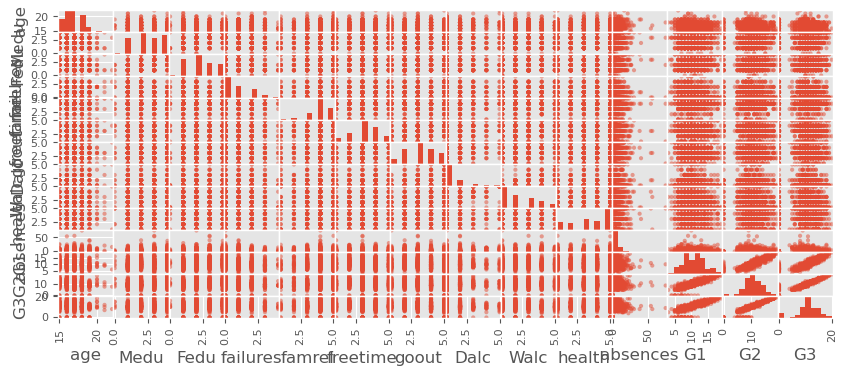

In [656]:
pd.plotting.scatter_matrix(dfMerged)

### Question 1: How Does high alcohol consumption directly impact grades?

Preping the database by converting grades to integers, calcuate grade averages

In [651]:
# pd.set_option('max_columns', None)

#Make a backup copy of the original dfMerged
baseDf = dfMerged

# convert scale columns into integer
baseDf['Dalc'] = baseDf['Dalc'].astype(int)
baseDf['Walc'] = baseDf['Walc'].astype(int)
baseDf['absences'] = baseDf['absences'].astype(int)
baseDf['G1'] = baseDf['G1'].astype(int)
baseDf['G2'] = baseDf['G2'].astype(int)
baseDf['G3'] = baseDf['G3'].astype(int)

baseDf['avgGrade'] = baseDf[['G1', 'G2', 'G3']].mean(axis=1)
baseDf['avgGrade%'] = baseDf['avgGrade'] / 20

baseDf

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avgGrade,avgPercentage,DalcAverages,avgGrade%
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,...,4.0,1,1,3.0,6,5,6,6,5.666667,0.283333,NaN,0.283333
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,...,3.0,1,1,3.0,4,5,5,6,5.333333,0.266667,0.546745,0.266667
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,...,2.0,2,3,3.0,10,7,8,10,8.333333,0.416667,0.500672,0.416667
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,...,2.0,1,1,5.0,2,15,14,15,14.666667,0.733333,0.529259,0.733333
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,...,2.0,1,2,5.0,4,6,10,10,8.666667,0.433333,0.490741,0.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,MS,F,19,R,GT3,A,1,1,at_home,at_home,course,yes,...,4.0,1,4,1.0,0,8,0,0,2.666667,0.133333,NaN,0.133333
666,MS,F,18,R,GT3,T,2,2,services,other,home,yes,...,1.0,1,1,4.0,5,14,14,15,14.333333,0.716667,NaN,0.716667
667,MS,F,18,R,LE3,A,1,2,at_home,other,course,yes,...,4.0,1,4,5.0,0,16,15,15,15.333333,0.766667,NaN,0.766667
668,MS,F,19,R,GT3,T,1,1,at_home,other,course,yes,...,3.0,1,1,3.0,4,7,8,9,8.000000,0.400000,NaN,0.400000


I'm curious to see if the amount of weekday alcohol consumption affect academic performance. The reality is, it doesn't affect grades in the way I expected it to.

It seems like students who has low weekday alcohol consumption has a wider range of test performance outcome, while daily alcohol enjoyers perform more average during exams. The takeaway is, that if you drink alcohol on weekdays, you don't excell, or fail; you'll just be alright somehow.

<Axes: xlabel='Dalc', ylabel='avgGrade%'>

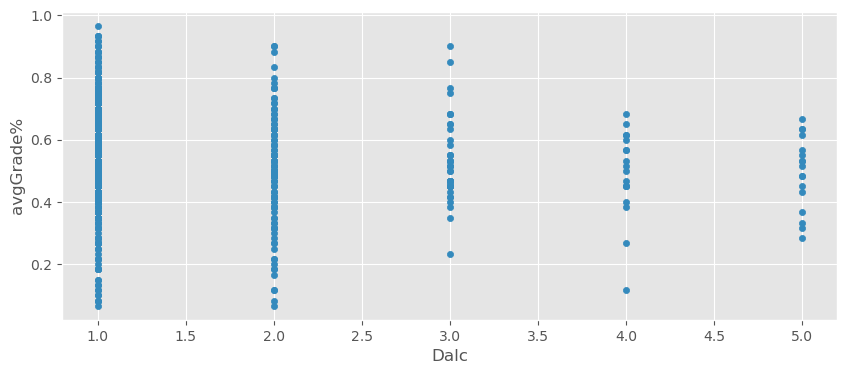

In [364]:
baseDf.plot(kind="scatter", x="Dalc", y='avgGrade%')

Similar cases applies to weekend drinkers - except that the effect is even less.

<Axes: xlabel='Walc', ylabel='avgGrade%'>

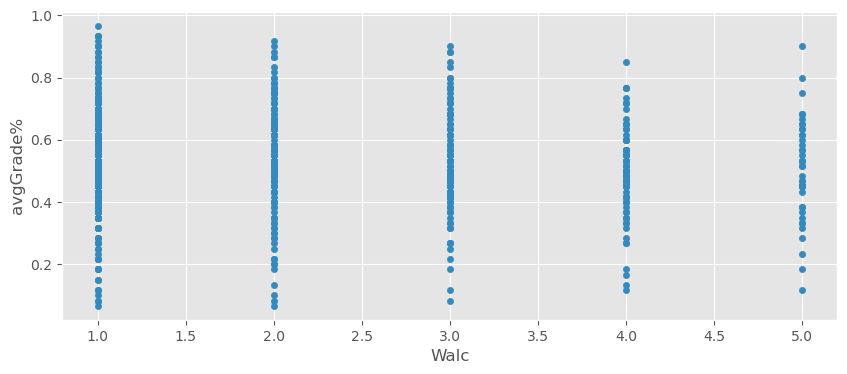

In [366]:
baseDf.plot(kind="scatter", x="Walc", y='avgGrade%')

Here I want to calculate the average overall exam score of each consumption group, and see if the line goes up or down. 

I would like to do it with both Weekday drinkers and weekend drinkers:

In [393]:
#Weekday drinkers
DalcAvgsScore = baseDf.groupby('Dalc')['avgGrade%'].mean().reset_index(drop=True)
DalcAvgsScore
groupByDalc = pd.Series([1,2,3,4,5], name='groupByDalc')

frame = {'Weekday drinking amount': groupByDalc,
         'Weekday drinkers average test score': DalcAvgsScore}

df_groupByDalc_avgGrade = pd.DataFrame(frame)
df_groupByDalc_avgGrade

,Weekday drinking amount,Weekday drinkers average test score
0,1,0.546745
1,2,0.500672
2,3,0.529259
3,4,0.490741
4,5,0.494118


In [394]:
#Weekend drinkers
WalcAvgsScore = baseDf.groupby('Walc')['avgGrade%'].mean().reset_index(drop=True)
WalcAvgsScore
groupByWalc = pd.Series([1,2,3,4,5], name='groupByWalc')

frame = {'Weekend drinking amount': groupByWalc,
         'Weekend drinkers average test score': WalcAvgsScore}

df_groupByWalc_avgGrade = pd.DataFrame(frame)
df_groupByWalc_avgGrade

,Weekend drinking amount,Weekend drinkers average test score
0,1,0.546952
1,2,0.548039
2,3,0.530780
3,4,0.495926
4,5,0.501087


And again, much to my surprise, the differences in average for each alcohol consumption group is less than what I expected.

(0.0, 1.0)

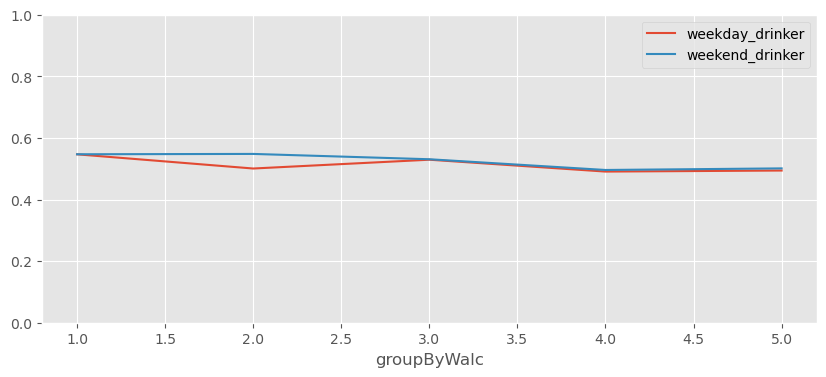

In [611]:
WalcAvgsScore = baseDf.groupby('Walc')['avgGrade%'].mean()
DalcAvgsScore = baseDf.groupby('Dalc')['avgGrade%'].mean()

DalcAvgsScore

plotdf = pd.DataFrame({
    'weekday_drinker': DalcAvgsScore,
    'weekend_drinker': WalcAvgsScore
    }, index = groupByWalc
)

lines = plotdf.plot.line()
plt.ylim(0,1)


Zooming in a little bit: 

54.7% for the group with lowest alcohol consumption, 
49.4% for the group with the highest alcohol consumption.

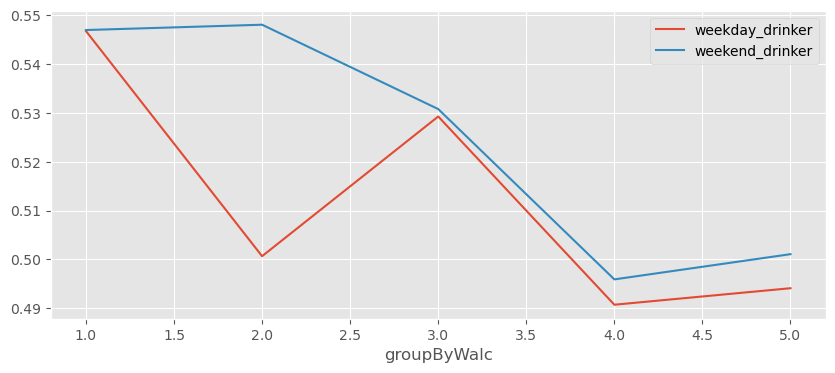

In [612]:
WalcAvgsScore = baseDf.groupby('Walc')['avgGrade%'].mean()
DalcAvgsScore = baseDf.groupby('Dalc')['avgGrade%'].mean()

plotdf = pd.DataFrame({
    'weekday_drinker': DalcAvgsScore,
    'weekend_drinker': WalcAvgsScore
    }, index = groupByWalc
)

lines = plotdf.plot.line()

Next, for people who score above 3 for both weekend drinking and weekday drinking:

In [413]:
df_heavyDrinkers = baseDf[(baseDf['Walc'] > 3) & (baseDf['Dalc'] > 3)]
df_heavyDrinkers['avgGrade%'].mean()

0.49197530864197536

The average exam score of students, who both drink during the weekend and during the week days, is slightly below the average test score of both weekend drinker and weekday drinker.

(0.0, 1.0)

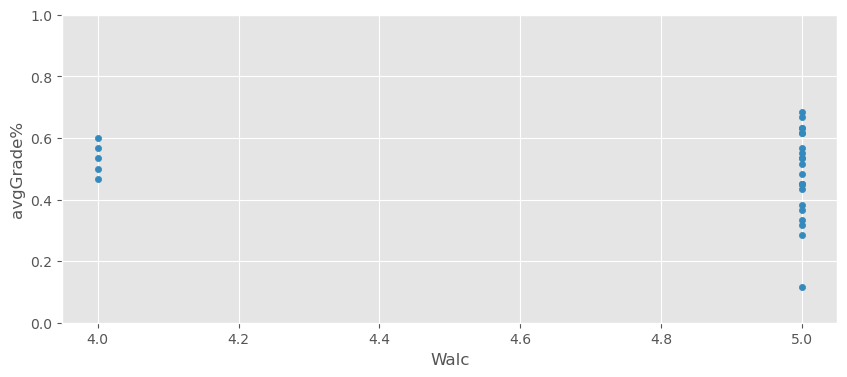

In [613]:
df_heavyDrinkers.plot(kind="scatter", x="Walc", y='avgGrade%')
plt.ylim(0,1)


(0.0, 1.0)

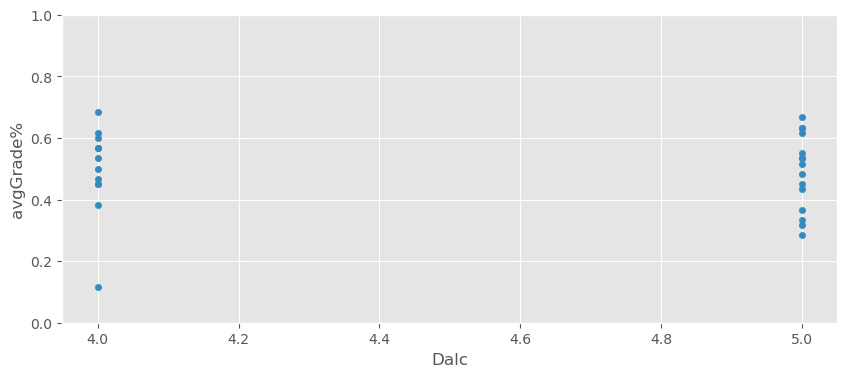

In [614]:
df_heavyDrinkers.plot(kind="scatter", x="Dalc", y='avgGrade%')
plt.ylim(0,1)

It is also apparent that the performance of those individuals seem average, or slightly below average.

### Question 2: Is quality of family relationship related to alcohol consumption?

The presumption is that when family members neglect their children, they would be more likely to resort to acoholism.

Starting off, I'm grouping the data based on weekday alcohol consumption, then count the number of people that gave different ratings for their family relationship quality.

In [419]:
baseDf['famrel'] = baseDf['famrel'].astype(int)

In [444]:
df_famrel_Walc = baseDf.groupby('Walc')['famrel'].value_counts()

df_famrel_Walc

Walc  famrel
1     4         127
      5          82
      3          32
      2           9
      1           7
               ... 
5     4          19
      5          13
      3           7
      1           4
      2           3
Name: count, Length: 24, dtype: int64

This number series isn't easy to process; let's break it down into multiple different series.

In [489]:
Walc_1 = baseDf[baseDf['famrel'] == 1]

#group by family relationship, see how many counts
Walc_1_df = Walc_1['Walc'].value_counts().to_frame()
Walc_1_df.reset_index(level=0, inplace=True)
Walc_1_df.sort_values(by="Walc").reset_index(drop=True)

,Walc,count
0,1,7
1,2,7
2,3,4
3,5,4


This means that in people who reported to have family quality rating of 1, 4 people reported that they drink a lot on the weekdays.

In [518]:
dfFillGap = pd.DataFrame({'Walc': [1,2,3,4,5], 'count': [0,0,0,0,0]})
dfFillGap
dfWalc1 = pd.merge(Walc_1_df, dfFillGap, on='Walc', how='outer').fillna(0).sort_values(by="Walc").reset_index(drop=True).drop('count_y', axis=1)

dfWalc1 


,Walc,count_x
0,1,7.0
1,2,7.0
2,3,4.0
3,4,0.0
4,5,4.0


<Axes: ylabel='count'>

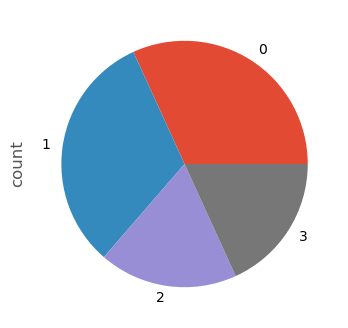

In [511]:
Walc_1_df['count'].plot(kind="pie")

Now one series is sorted, time to do the rest.

I'll use the code above repeatedly. (I could have just defined a function but we only have 5 data groups)

In [519]:
Walc_2 = baseDf[baseDf['famrel'] == 2]

#group by family relationship, see how many counts
Walc_2_df = Walc_2['Walc'].value_counts().to_frame()
Walc_2_df.reset_index(level=0, inplace=True)
Walc_2_df.sort_values(by="Walc").reset_index(drop=True)

#merge the fill gap df with the main dataframe, fill NaN with 0, sort by Walc, reset index, and remove excess column
dfWalc2 = pd.merge(Walc_2_df, dfFillGap, on='Walc', how='outer').fillna(0).sort_values(by="Walc").reset_index(drop=True).drop('count_y', axis=1)
dfWalc2


,Walc,count_x
0,1,9
1,2,5
2,3,5
3,4,7
4,5,3


In [531]:
Walc_3 = baseDf[baseDf['famrel'] == 3]
#group by family relationship, see how many counts
Walc_3_df = Walc_3['Walc'].value_counts().to_frame()
Walc_3_df.reset_index(level=0, inplace=True)
Walc_3_df.sort_values(by="Walc").reset_index(drop=True)

#merge the fill gap df with the main dataframe, fill NaN with 0, sort by Walc, reset index, and remove excess column
dfWalc3 = pd.merge(Walc_3_df, dfFillGap, on='Walc', how='outer').fillna(0).sort_values(by="Walc").reset_index(drop=True).drop('count_y', axis=1)
dfWalc3


,Walc,count_x
0,1,32
1,2,25
2,3,21
3,4,19
4,5,7


In [532]:
Walc_4 = baseDf[baseDf['famrel'] == 4]
#group by family relationship, see how many counts
Walc_4_df = Walc_4['Walc'].value_counts().to_frame()
Walc_4_df.reset_index(level=0, inplace=True)
Walc_4_df.sort_values(by="Walc").reset_index(drop=True)

#merge the fill gap df with the main dataframe, fill NaN with 0, sort by Walc, reset index, and remove excess column
dfWalc4 = pd.merge(Walc_4_df, dfFillGap, on='Walc', how='outer').fillna(0).sort_values(by="Walc").reset_index(drop=True).drop('count_y', axis=1)
dfWalc4


,Walc,count_x
0,1,127
1,2,77
2,3,65
3,4,43
4,5,19


In [533]:
Walc_5 = baseDf[baseDf['famrel'] == 5]
#group by family relationship, see how many counts
Walc_5_df = Walc_5['Walc'].value_counts().to_frame()
Walc_5_df.reset_index(level=0, inplace=True)
Walc_5_df.sort_values(by="Walc").reset_index(drop=True)

#merge the fill gap df with the main dataframe, fill NaN with 0, sort by Walc, reset index, and remove excess column
dfWalc5 = pd.merge(Walc_5_df, dfFillGap, on='Walc', how='outer').fillna(0).sort_values(by="Walc").reset_index(drop=True).drop('count_y', axis=1)
dfWalc5


,Walc,count_x
0,1,82
1,2,39
2,3,29
3,4,21
4,5,13


Now the data are all sorted, time to plot a bar chart to see what the data looks like:

<Axes: >

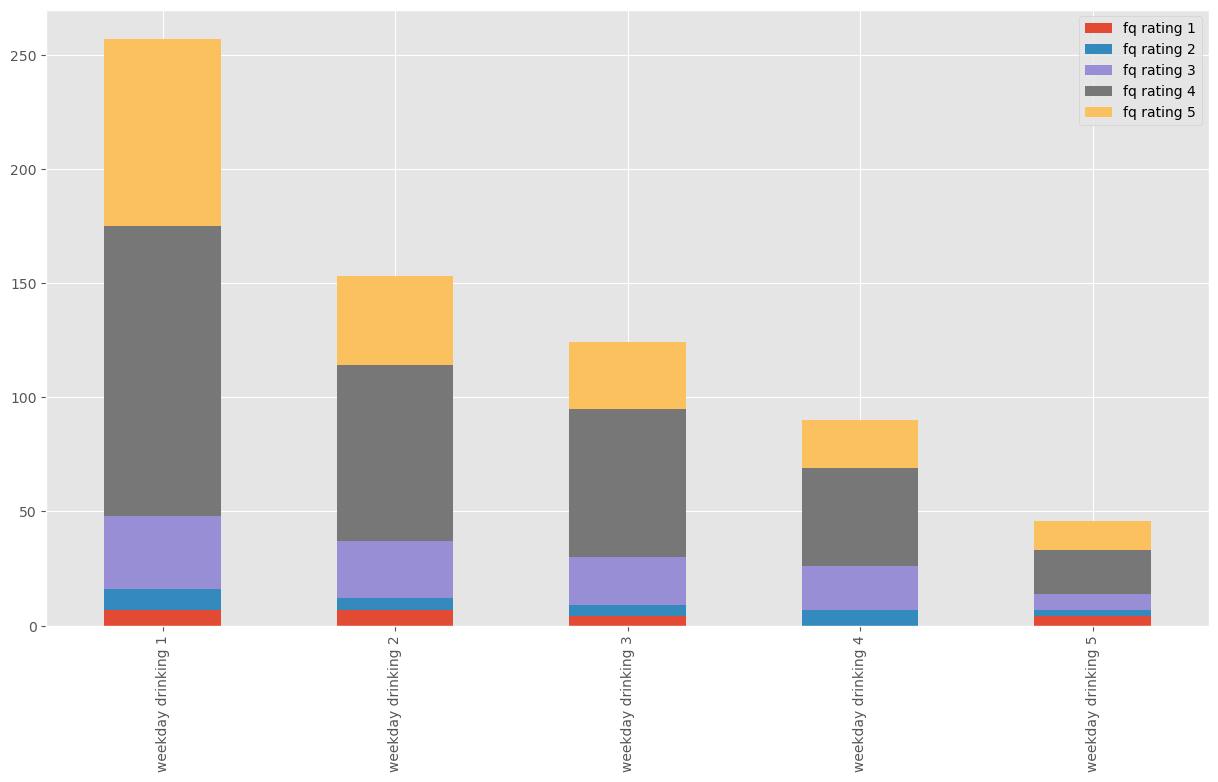

In [618]:


plotdata = pd.DataFrame({
    'fq rating 1': dfWalc1["count_x"].array,
    'fq rating 2': dfWalc2["count_x"].array,
    'fq rating 3': dfWalc3["count_x"].array,
    'fq rating 4': dfWalc4["count_x"].array,
    'fq rating 5': dfWalc5["count_x"].array},
    index=['weekday drinking 1', 'weekday drinking 2', 'weekday drinking 3', 'weekday drinking 4', 'weekday drinking 5']
)
plotdata.plot(kind='bar', stacked=True,figsize=(15, 8))


In [619]:
plotdata

,fq rating 1,fq rating 2,fq rating 3,fq rating 4,fq rating 5
weekday drinking 1,7.0,9,32,127,82
weekday drinking 2,7.0,5,25,77,39
weekday drinking 3,4.0,5,21,65,29
weekday drinking 4,0.0,7,19,43,21
weekday drinking 5,4.0,3,7,19,13


Not exactly clear. I wanted to see how family rating are affected by weekday alcohol consumption, and perhaps a percentage showing the weight of distribution inside the group, is more helpful than seeing the total count.

To rephrase that, I want to see how family rating is affected by alcohol consumption. 

I want to count how many people has reported for each family rating (from 1-5), in each drinking rating group (from 1-5). This polulation is represented as a percentage figure (count of this rating / total numbers of entry). I could then cross-compare the different drinking rating groups to see emerging trends.

In [657]:
transposed_plotdata = plotdata.transpose()
transposed_plotdata

,weekday drinking 1,weekday drinking 2,weekday drinking 3,weekday drinking 4,weekday drinking 5
fq rating 1,7.0,7.0,4.0,0.0,4.0
fq rating 2,9.0,5.0,5.0,7.0,3.0
fq rating 3,32.0,25.0,21.0,19.0,7.0
fq rating 4,127.0,77.0,65.0,43.0,19.0
fq rating 5,82.0,39.0,29.0,21.0,13.0


In [643]:
row_sums_transposed = transposed_plotdata.sum(axis=1)
row_sums_transposed

fq rating 1     22.0
fq rating 2     29.0
fq rating 3    104.0
fq rating 4    331.0
fq rating 5    184.0
dtype: float64

In [647]:
transposed_plotdata_percentage = transposed_plotdata.div(row_sums_transposed, axis=0)
transposed_plotdata_percentage

,weekday drinking 1,weekday drinking 2,weekday drinking 3,weekday drinking 4,weekday drinking 5
fq rating 1,0.318182,0.318182,0.181818,0.000000,0.181818
fq rating 2,0.310345,0.172414,0.172414,0.241379,0.103448
fq rating 3,0.307692,0.240385,0.201923,0.182692,0.067308
fq rating 4,0.383686,0.232628,0.196375,0.129909,0.057402
fq rating 5,0.445652,0.211957,0.157609,0.114130,0.070652


<Axes: >

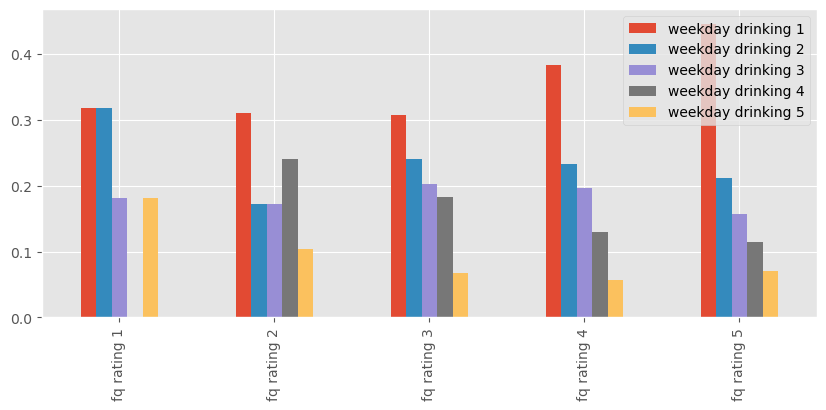

In [649]:
transposed_plotdata_percentage.plot(kind='bar')

<Axes: >

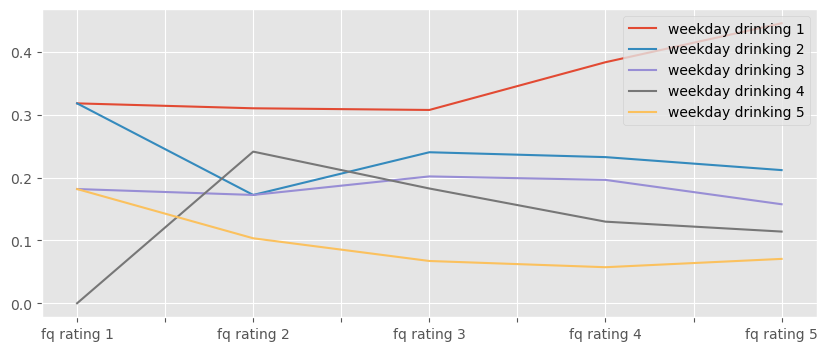

In [650]:
transposed_plotdata_percentage.plot(kind='line')

The conclusion is that:

- It is apparent that more students reported having low weekday alcohol consumption.

- For the population reported low weekday drinking (rating 1), a higher percentage of this population seem to give a high family relationship-quality rating. (the percentage goes up)

- The rest seems to show a declining trend, indicating that worse family relationship quality tend to lead to more weekday drinking, although this correlation isn't prominent nor is it apparent. 



### Conclusions and future potential